<a href="https://colab.research.google.com/github/ilanmoshe52/Final_Project/blob/main/dpss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Date', 'Daily minimum temperatures'], dtype='object')
10.6123046875
1024 <class 'list'> None


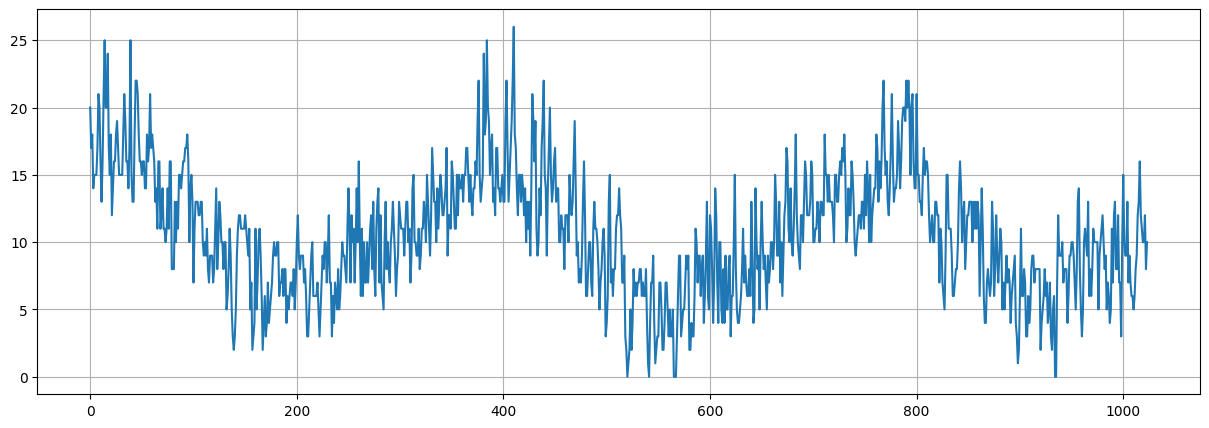

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import windows, welch
from scipy.fft import fft
import pandas as pd

# Constants
num_samples = 1024
time_series_length = 1024
num_sin_waves = 2  # Number of sinusoidal waves
noise_level = 5

# read the signal
df = pd.read_csv('1.csv')
df.head()
print(df.columns)

df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce').fillna(0).astype(int)
signal = df['Daily minimum temperatures'][:num_samples].astype(int)
signal = list(signal)
amp = np.mean(signal)
noise_level = 0.75*amp
print(len(signal) , type(signal) , print(amp))

plt.figure(figsize=(15,5))
plt.plot(signal)
plt.grid(True)
plt.show()


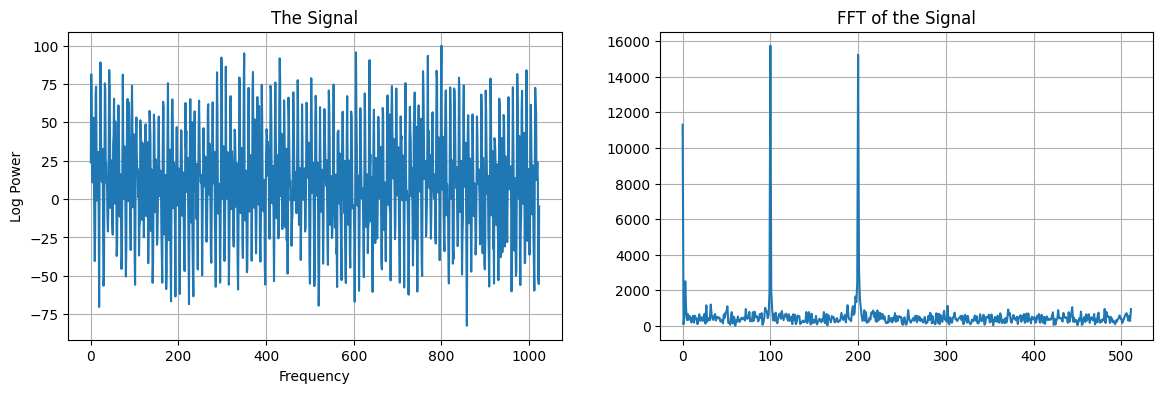

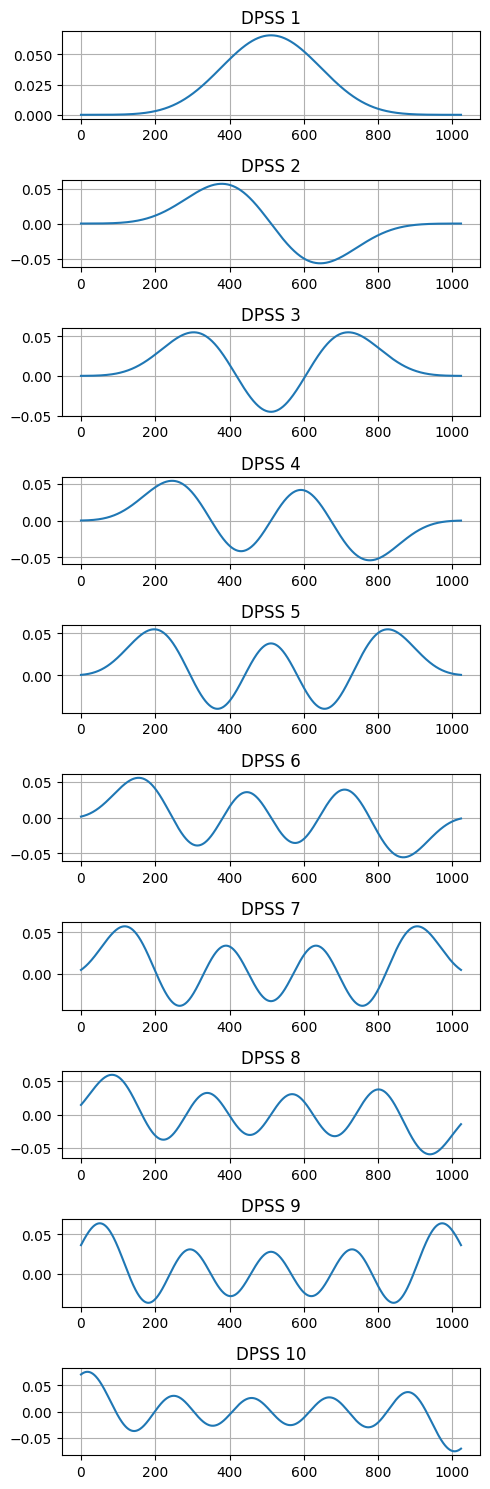

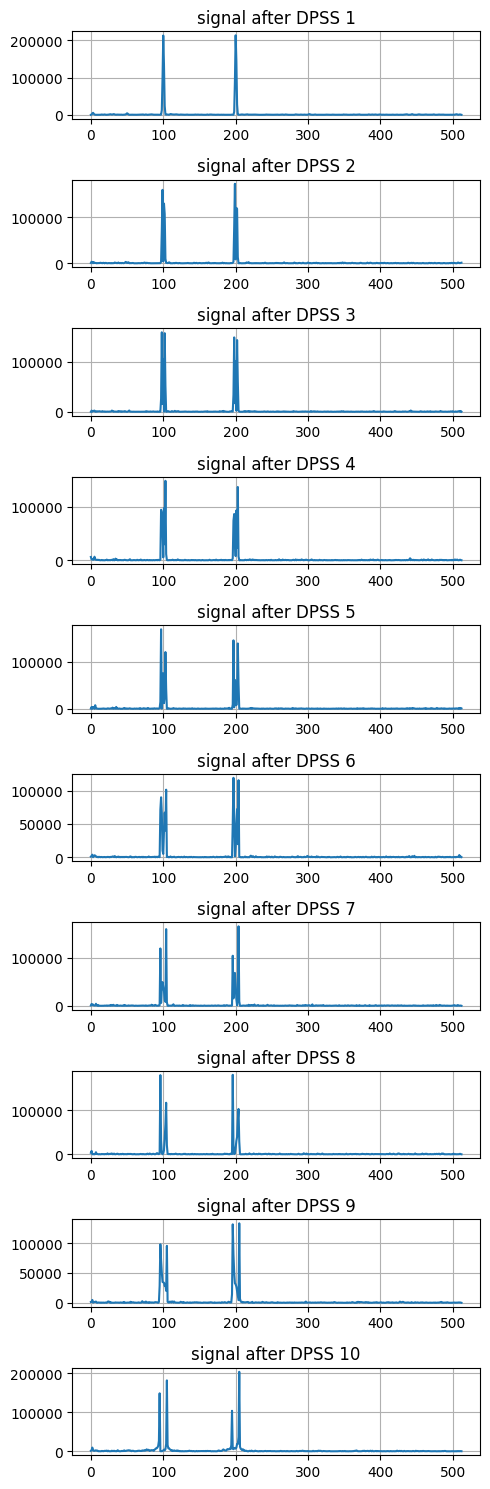

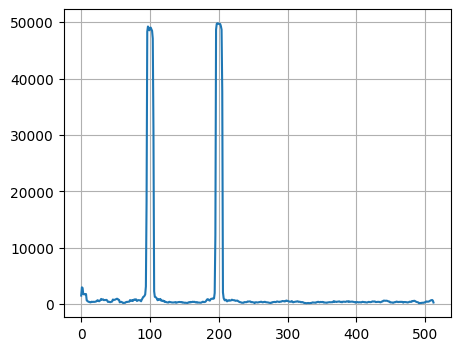

In [30]:
# Generate signal composed of sinusoidal waves and noise
t = np.linspace(0, 1, time_series_length)
signal1 = np.sum([amp* np.sin(2 * np.pi * (i + 1)*100 * t) for i in range(num_sin_waves)], axis=0) + noise_level * np.random.randn(time_series_length)

signal += signal1

# Plot FFT of the signal
fft_vals = fft(signal)
fig , ax = plt.subplots(1,2 , figsize=( 14,4))
ax[1].plot( np.abs(fft_vals[0:int(len(fft_vals)/2)]))
ax[0].plot(signal)
ax[0].set_title('The Signal')
ax[1].set_title('FFT of the Signal')
ax[0].grid(True)
ax[1].grid(True)
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Log Power')
plt.show()

# Apply DPSS with optimized parameters
half_window_length = time_series_length // 4
dpss = windows.dpss(time_series_length, 5, 10)

# Visualize all signals created by DPSS
plt.figure(figsize=(5, 15))
for i in range(len(dpss)):
    plt.subplot( len(dpss) , 1, i+1)
    plt.plot(dpss[i])
    plt.title(f'DPSS {i+1}')
    plt.grid(True)
plt.tight_layout()
plt.show()

# Compute PSD estimates using multitaper method for all signals created by DPSS
plt.figure(figsize=(5, 15))
psd_estimates = []
for i in range(len(dpss)):
    _, pxx = welch(signal, fs=1.0, window=dpss[i], nperseg=time_series_length, noverlap=None, nfft=None)
    plt.subplot( len(dpss) , 1, i+1)
    plt.plot(pxx)
    plt.grid(True)
    plt.title(f'signal after DPSS {i+1}')
    psd_estimates.append(pxx)

plt.tight_layout()
plt.show()

# Create a new final signal by mean values of all signals
final_signal = np.mean(psd_estimates, axis=0)
plt.figure(figsize=(5, 4))
plt.grid(True)
plt.plot(final_signal)
plt.show()

In [31]:
a = np.where(final_signal>1000)
print(a)


(array([  0,   1,   2,   3,   4,   5,   6,   7,  89,  90,  91,  92,  93,
        94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       107, 108, 109, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207]),)


In [32]:
b = list(a[0])

In [33]:
indices = [i for i in range(1, len(b)) if (b[i] - b[i-1])>1 ]
print(indices)

[8, 29]
